# Prevalencia

Vamos a analizar el influjo de la prevalencia, en el devenir de la enfermedad

<div class="alert alert-block alert-info">
En epidemiología, se denomina <strong>prevalencia</strong> a la proporción de individuos de un grupo o una población (en medicina, persona), que presentan una característica o evento determinado (en medicina, enfermedades).    
</div>

Se define <strong>R0</strong>, como el nº de personas que infecta cada persona, en cada ciclo de infección.

<div class="alert alert-block alert-info">
Vamos a generar una lista de tablasy gráficas para ver la evolución del nº de infectados, al variar la prevalencia, y el R0.
</div>


In [1]:
import numpy as np
import pandas as pd 
import time
from datetime import datetime, date, time, timedelta

SITUACION_INICIAL = 1
prevalencia = 0 
R0 = 5.7



In [2]:
def Get_Header(GENERACIONES,df):
    array_fechas = []
    FECHA_INICIAL_STR = '2020-02-01'
    FECHA_INICIAL = datetime.strptime(FECHA_INICIAL_STR, "%Y-%m-%d")
    modified_date = FECHA_INICIAL
    NUM_GENERACIONES = range(1,GENERACIONES)
    for generacion in NUM_GENERACIONES:
        modified_date += timedelta(days=7)
        array_fechas.append(datetime.strftime(modified_date, "%Y-%m-%d"))
    df.columns = array_fechas
    return df

def Calcular_Cuadro_Prevalencias(R0,GENERACIONES,ARRAY_PREVALENCIAS):
    SITUACION_INICIAL=1

    diccionario_prevalencias = {}
    array=[]

    for prevalencia in ARRAY_PREVALENCIAS : 
        infectados_en_esta_generacion = SITUACION_INICIAL
        NUM_GENERACIONES = range(1,GENERACIONES)
        array=[]
        for generacion in NUM_GENERACIONES:
            infectados_en_esta_generacion = infectados_en_esta_generacion * R0 * (1-prevalencia)
            array.append(infectados_en_esta_generacion)
            diccionario_prevalencias['prevalencia ' + str(prevalencia)[0:4] + ' y R0 ' + str(R0)] = array
    df = pd.DataFrame.from_dict(diccionario_prevalencias,'index')    
    df = Get_Header(GENERACIONES,df)
    df = df.astype(np.int64)
    return df.T

In [3]:
# Auxiliary functions
def interpolate_dataframe(df,freq):
    if freq == 'H':
        rng = pd.date_range(df.index.min(), df.index.max() + pd.Timedelta(23, 'H'), freq='H')
    elif freq == 'D' :  
        rng = pd.date_range(
            datetime.strptime(str(df.index.min())[:10]+' 00:00:00', "%Y-%m-%d %H:%M:%S") ,
            datetime.strptime(str(df.index.max())[:10]+' 00:00:00', "%Y-%m-%d %H:%M:%S"), 
            freq='D')
        df.index = pd.to_datetime(df.index)  
    df2 = df.reindex(rng)
    df = df2
    for column in df.columns :
        s = pd.Series(df[column])
        s.interpolate(method="quadratic", inplace =True)
        df[column] = pd.DataFrame([s]).T
    df.index.name = 'Fecha'
    return df


In [4]:
# first execution
GENERACIONES=8
ARRAY_PREVALENCIAS = np.linspace(0,0.70,8)
ARRAY_PREVALENCIAS
df =  Calcular_Cuadro_Prevalencias(R0=R0,GENERACIONES=GENERACIONES,ARRAY_PREVALENCIAS=ARRAY_PREVALENCIAS)
df = df['prevalencia 0.0 y R0 5.7']
df



2020-02-08         5
2020-02-15        32
2020-02-22       185
2020-02-29      1055
2020-03-07      6016
2020-03-14     34296
2020-03-21    195489
Name: prevalencia 0.0 y R0 5.7, dtype: int64

In [5]:
   
from matplotlib import pyplot as plt    
import pandas as pd
import numpy as np

def Get_Chart(df, title="default"):
    fig = plt.figure(figsize=(8, 6), dpi=80)
    for ca in df.columns:
        plt.plot(df[ca])
        plt.legend(df.columns)
        fig.suptitle(title, fontsize=20)
    return plt



,prevalencia 0.0 y R0 2.7,prevalencia 0.09 y R0 2.7,prevalencia 0.19 y R0 2.7,prevalencia 0.3 y R0 2.7,prevalencia 0.39 y R0 2.7,prevalencia 0.49 y R0 2.7,prevalencia 0.6 y R0 2.7,prevalencia 0.7 y R0 2.7
2020-02-08,2,2,2,1,1,1,1,0
2020-02-15,7,5,4,3,2,1,1,0
2020-02-22,19,14,10,6,4,2,1,0
2020-02-29,53,34,21,12,6,3,1,0
2020-03-07,143,84,47,24,11,4,1,0
2020-03-14,387,205,101,45,18,6,1,0
2020-03-21,1046,500,219,86,29,8,1,0


,prevalencia 0.0 y R0 3.7,prevalencia 0.09 y R0 3.7,prevalencia 0.19 y R0 3.7,prevalencia 0.3 y R0 3.7,prevalencia 0.39 y R0 3.7,prevalencia 0.49 y R0 3.7,prevalencia 0.6 y R0 3.7,prevalencia 0.7 y R0 3.7
2020-02-08,3,3,2,2,2,1,1,1
2020-02-15,13,11,8,6,4,3,2,1
2020-02-22,50,36,25,17,10,6,3,1
2020-02-29,187,122,76,44,24,11,4,1
2020-03-07,693,409,227,116,53,21,7,1
2020-03-14,2565,1363,672,301,119,40,10,1
2020-03-21,9493,4540,1990,781,265,74,15,2


,prevalencia 0.0 y R0 4.7,prevalencia 0.09 y R0 4.7,prevalencia 0.19 y R0 4.7,prevalencia 0.3 y R0 4.7,prevalencia 0.39 y R0 4.7,prevalencia 0.49 y R0 4.7,prevalencia 0.6 y R0 4.7,prevalencia 0.7 y R0 4.7
2020-02-08,4,4,3,3,2,2,1,1
2020-02-15,22,17,14,10,7,5,3,1
2020-02-22,103,75,53,35,22,12,6,2
2020-02-29,487,320,199,117,63,30,12,3
2020-03-07,2293,1354,751,385,178,71,23,5
2020-03-14,10779,5728,2825,1268,502,168,44,7
2020-03-21,50662,24231,10624,4172,1418,395,83,11


,prevalencia 0.0 y R0 5.7,prevalencia 0.09 y R0 5.7,prevalencia 0.19 y R0 5.7,prevalencia 0.3 y R0 5.7,prevalencia 0.39 y R0 5.7,prevalencia 0.49 y R0 5.7,prevalencia 0.6 y R0 5.7,prevalencia 0.7 y R0 5.7
2020-02-08,5,5,4,3,3,2,2,1
2020-02-15,32,26,20,15,11,8,5,2
2020-02-22,185,135,94,63,40,23,11,5
2020-02-29,1055,692,432,253,136,65,27,8
2020-03-07,6016,3552,1971,1011,467,188,61,14
2020-03-14,34296,18226,8990,4034,1600,535,140,25
2020-03-21,195489,93502,40997,16099,5472,1527,320,42


,prevalencia 0.0 y R0 6.7,prevalencia 0.09 y R0 6.7,prevalencia 0.19 y R0 6.7,prevalencia 0.3 y R0 6.7,prevalencia 0.39 y R0 6.7,prevalencia 0.49 y R0 6.7,prevalencia 0.6 y R0 6.7,prevalencia 0.7 y R0 6.7
2020-02-08,6,6,5,4,4,3,2,2
2020-02-15,44,36,28,21,16,11,7,4
2020-02-22,300,219,153,103,64,37,19,8
2020-02-29,2015,1322,825,483,261,125,51,16
2020-03-07,13501,7972,4424,2269,1049,421,138,32
2020-03-14,90458,48073,23713,10642,4220,1413,370,65
2020-03-21,606071,289881,127102,49912,16966,4734,992,132


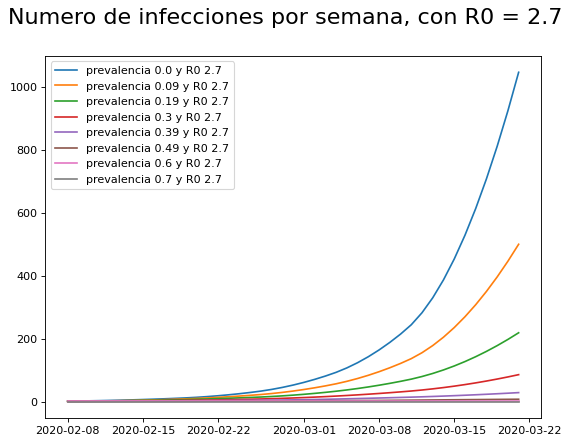

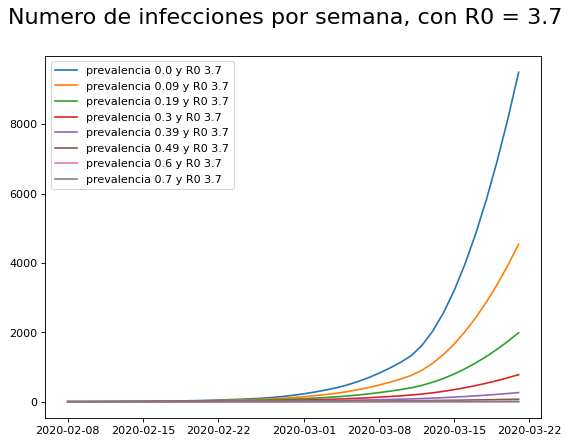

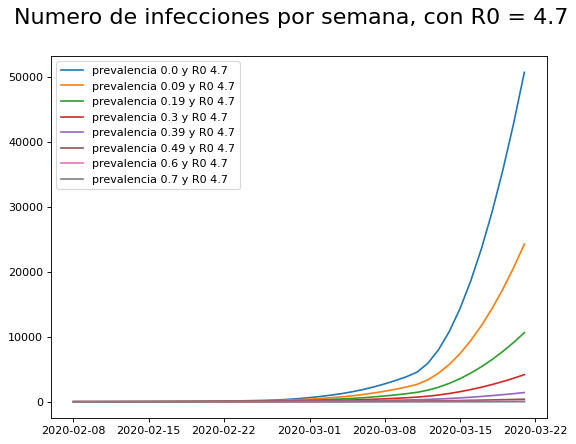

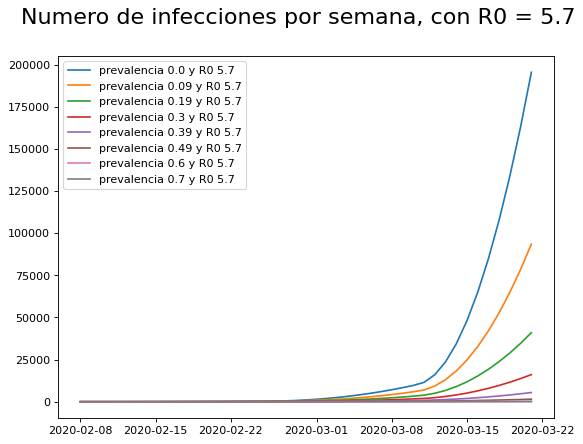

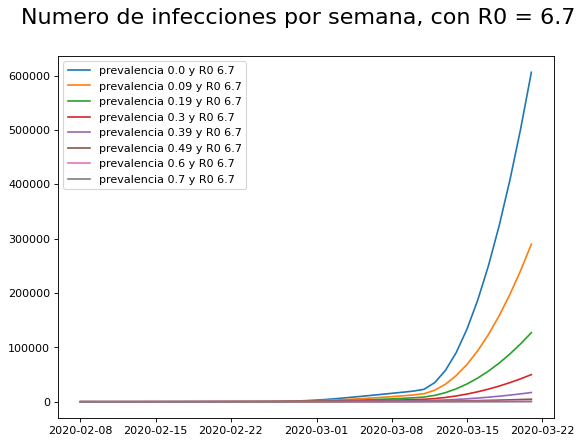

In [6]:
from IPython.display import display, HTML

ARRAY_R0S = [2.7,
             3.7 ,
             4.7,
             5.7,
             6.7 ]

for R0 in ARRAY_R0S : 
    
    df =  Calcular_Cuadro_Prevalencias(R0=R0,GENERACIONES=GENERACIONES,ARRAY_PREVALENCIAS=ARRAY_PREVALENCIAS)
    display(HTML (df.to_html()))
    plt = Get_Chart(df=interpolate_dataframe(df,'D'), title = 'Numero de infecciones por semana, con R0 = ' + str(R0))



TODO: 
    - Hacer gráfico de la evolución del nº de infectados, en el confinamiento (R0<1)
    

# Conclusiones:

- Para un R0 estimado de 5.7 del COVID-19, hace falta un <strong>70% de prevalencia</strong>, para que no haya brotes masivos.


- Las <strong>medidas de distanciamiento social</strong>, influyen para mantener bajo el R0, el cual influye mucho en el número de infectados.

    
- Con <strong>prevalencia bajas</strong>, aunque no haya inmunidad de grupo, el <strong>nº de infectados desciende significativamente</strong>. (En España, que los estudios sugieren una prevalencia menor del 10%, podría haber 1/3 ó 1/2 muertos)


- Además de la prevalencia, tambien <strong>es importante</strong>, tener controlado <strong>,el nº de personas infectadas en cada momento</strong>:
  - Hay que <strong>detectar los brotes lo mas pronto posible</strong>, y reducir el R0 mediante la <strong>búsqueda de contactos del infectado</strong> cuando el brote es aún pequeño. 
  - En caso contrario, si no se puede controlar el brote, como el nº de infectados se disparará, se pueden realizar <strong>confinamientos parciales intermitentes</strong>, para reducir el R0 por debajo de 1, hasta que el nº de infectados baje. 



## Bonus : ¿ Sirve de algo quedarse en casa  ? 
    

,prevalencia 0.0 y R0 2.7,prevalencia 0.0 y R0 3.7,prevalencia 0.0 y R0 4.7,prevalencia 0.0 y R0 5.7,prevalencia 0.0 y R0 6.7
2020-02-08,2,3,4,5,6
2020-02-15,7,13,22,32,44
2020-02-22,19,50,103,185,300
2020-02-29,53,187,487,1055,2015
2020-03-07,143,693,2293,6016,13501
2020-03-14,387,2565,10779,34296,90458
2020-03-21,1046,9493,50662,195489,606071


Total de infectados en cada escenario : 
prevalencia 0.0 y R0 2.7      1657
prevalencia 0.0 y R0 3.7     13004
prevalencia 0.0 y R0 4.7     64350
prevalencia 0.0 y R0 5.7    237078
prevalencia 0.0 y R0 6.7    712395
dtype: int64


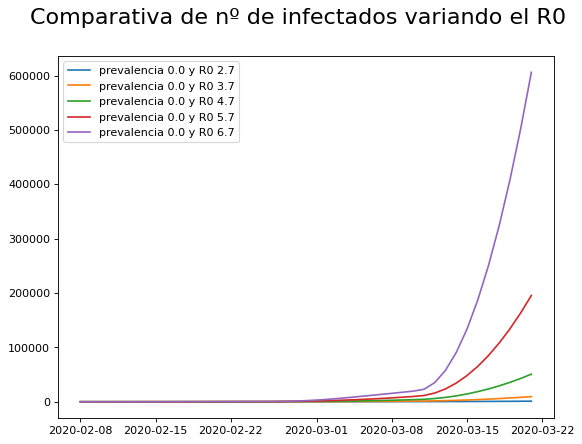

In [7]:

ARRAY_R0S = [2.7,
             3.7 ,
             4.7,
             5.7,
             6.7 ]

df_R0s = pd.DataFrame()

for R0 in ARRAY_R0S : 
    df =  Calcular_Cuadro_Prevalencias(R0=R0,GENERACIONES=GENERACIONES,ARRAY_PREVALENCIAS=ARRAY_PREVALENCIAS)
    df_R0s[df.columns[0]] = df[df.columns[0]]


    
display(HTML (df_R0s.to_html()))
print("Total de infectados en cada escenario : " )
print( df_R0s.astype(np.int64).sum(axis=0) )

plt = Get_Chart(interpolate_dataframe(df_R0s,'D') ,title= 'Comparativa de nº de infectados variando el R0')   



In [8]:
#df = interpolate_dataframe(df_R0s)




Como se ve en la gráfica, bajar el R0, es muy importante, para detener el nº de infectados, y por ende en número de los fallecidos.


## Re- Bonus : Se me ha hecho larguísimo, ¿ Podría haber estado menos tiempo en casa  ? 


In [9]:
def comparacion_semanas():
    GENERACIONES=8
    SITUACION_INICIAL=1
    prevalencia=0
    diccionario_prevalencias={}
    R0=5.7
    i=1
    for NUM_GENERACIONES in range(5,8) : 
        infectados_en_esta_generacion=SITUACION_INICIAL
        array = []
        for generacion in  range(1,NUM_GENERACIONES):
            infectados_en_esta_generacion = infectados_en_esta_generacion * R0 * (1-prevalencia)
            array.append(infectados_en_esta_generacion)
        valor_actual = array[-1]
        # Calculamos el R0 con el confinamiento
        # En alemanio confinada el R0 estimado es un 0.7. Nosotros debería ser mas bajo
        NUEVO_R0 = 0.5
        while infectados_en_esta_generacion > 1 :
            infectados_en_esta_generacion = infectados_en_esta_generacion * NUEVO_R0 * (1-prevalencia)
            array.append(infectados_en_esta_generacion)
        diccionario_prevalencias[' R0 ' + str(R0) + ', parando en la semana ' + str(generacion)] = array
        i=1


    df = pd.DataFrame.from_dict(diccionario_prevalencias,'index')    
    df = Get_Header(df.shape[1]+1,df)
    df = df.T
    df.index = pd.to_datetime(df.index)

    return df 


Total de infectados en cada escenario : 
 R0 5.7, parando en la semana 4     2326
 R0 5.7, parando en la semana 5    13304
 R0 5.7, parando en la semana 6    75877
dtype: int64


,"R0 5.7, parando en la semana 4","R0 5.7, parando en la semana 5","R0 5.7, parando en la semana 6"
2020-02-08,5,5,5
2020-02-15,32,32,32
2020-02-22,185,185,185
2020-02-29,1055,1055,1055
2020-03-07,527,6016,6016
2020-03-14,263,3008,34296
2020-03-21,131,1504,17148
2020-03-28,65,752,8574
2020-04-04,32,376,4287
2020-04-11,16,188,2143


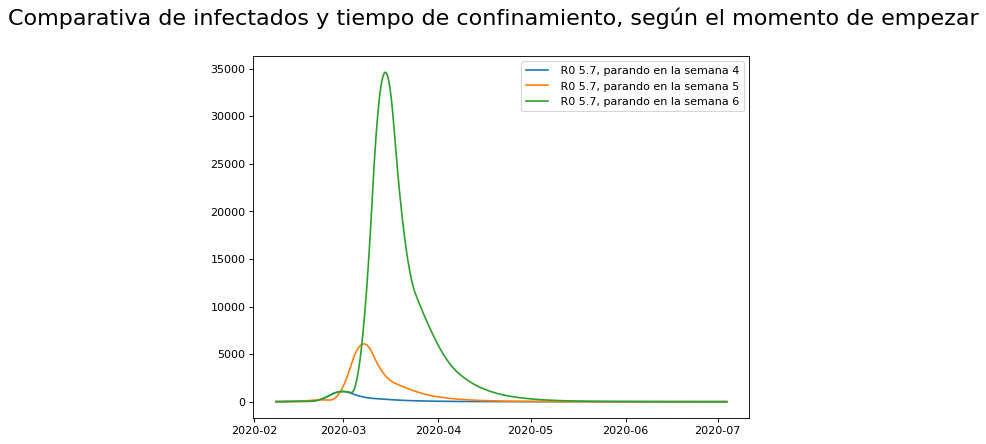

In [10]:
df = comparacion_semanas()
df= df.fillna(0)

print("Total de infectados en cada escenario : " )
print( df.astype(np.int64).sum(axis=0) )

plt = Get_Chart(df = interpolate_dataframe(df=df,freq='H'),title= 'Comparativa de infectados y tiempo de confinamiento, según el momento de empezar')  
df.astype(int)

Como se ve en del anterior gráfico, el tiempo que dura confinamiento, y el nº de infectados varía enormemente. 

Sin duda la demora en adoptar las restricciones - como se ve con esta gráfica de datos teóricos- ha influido en el tiempo de confinamiento, y mucho peor, ha costado un gran número de vidas.


